In [3]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

In [5]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['figure.titlesize'] = 16
mpl.rcParams['figure.figsize'] = (10, 8)

color_nv_green = "#76b900"
color_rdkit_blue = "#4300B9"
color_a100_magenta = "#EE3377"

In [23]:
n = 16000


xticks = ["RDKit", "PyTorch\n(extrap. n=1000)", "FPSim-Cupy on H100", "scikit-fingerprints", "Chemfp", "nvmolkit A100", "nvmolkit H100"]
seconds = [21.0, 7.472025, 6.95, 6.82, 2.17, 0.00724, 0.00563]
errors = [0.1, 0.021521, 0.03615155, 0.245, 0.01037135, 0.00005, 0.00046]

throughput = [ n * n / sec for sec in seconds ]
# Use percentage errors for throughput error bars
throughput_error = [ t * (err / sec) for t, err, sec in zip(throughput, errors, seconds) ]

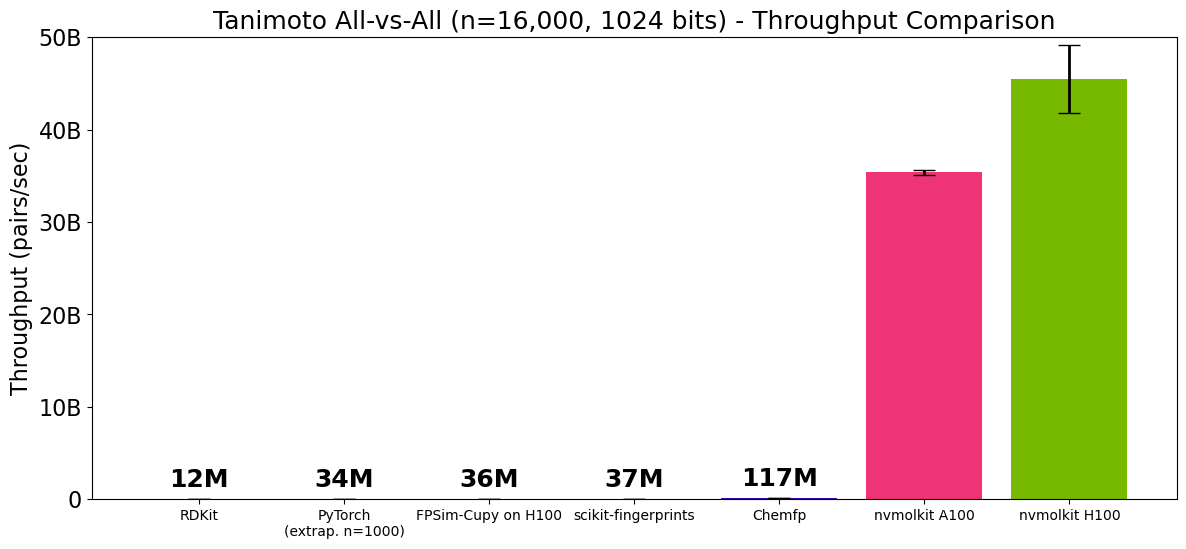

In [24]:
import matplotlib.ticker as mticker
plt.figure(figsize=(14, 6))
bar_colors = [color_rdkit_blue, color_rdkit_blue, color_rdkit_blue, color_rdkit_blue, color_rdkit_blue, color_a100_magenta, color_nv_green]  # Added orange for PyTorch
bars = plt.bar(xticks, throughput, yerr=throughput_error, capsize=8, color=bar_colors)
plt.ylabel("Throughput (pairs/sec)", fontsize=16)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10_000_000_000))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1e9)}B' if x >= 1e9 else f'{int(x):,}'))

# Annotate the first 5 data points with the value
for i in range(5):
    bar = bars[i]
    height = bar.get_height()
    plt.annotate(
        f"{int(height/1e6):,}M",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha='center', va='bottom', fontsize=18, fontweight='bold'
    )

plt.title("Tanimoto All-vs-All (n=16,000, 1024 bits) - Throughput Comparison", fontsize=18)
plt.ylim(0, max(throughput) * 1.1)
plt.xticks(fontsize=10)  # Smaller font size for x-axis labels
plt.show()

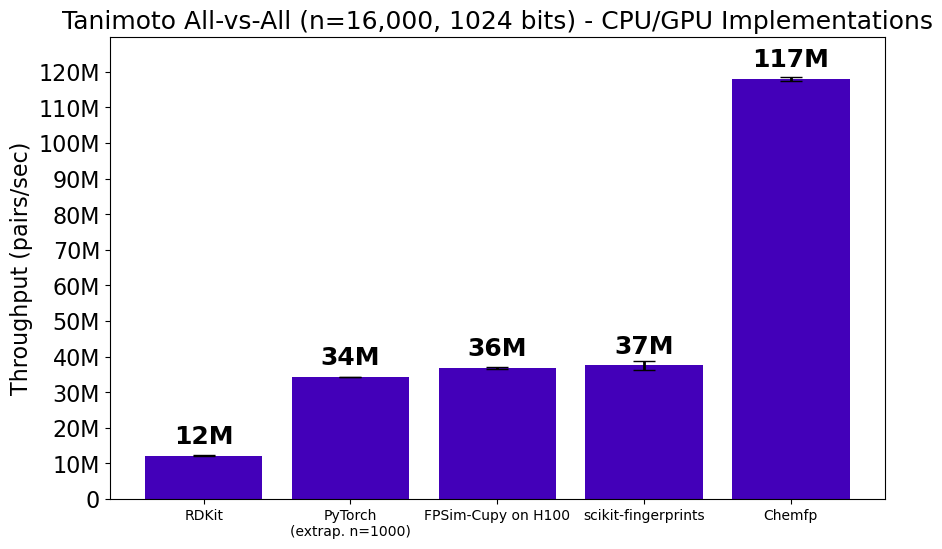

In [26]:
# Isolate the first 5 data points. Make bar plots for CPU-based implementations
plt.figure(figsize=(10, 6))  # Add figure size control for second plot
first_5_xticks = xticks[:5]
first_5_throughput = throughput[:5]
first_5_throughput_error = throughput_error[:5]
first_5_colors = bar_colors[:5]
first_5_bars = plt.bar(first_5_xticks, first_5_throughput, yerr=first_5_throughput_error, capsize=8, color=first_5_colors)
plt.ylabel("Throughput (pairs/sec)", fontsize=16)
plt.title("Tanimoto All-vs-All (n=16,000, 1024 bits) - CPU/GPU Implementations", fontsize=18)
plt.ylim(0, max(first_5_throughput) * 1.1)
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10_000_000))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x):,}'))

# Annotate all 5 bars
for i in range(5):
    bar = first_5_bars[i]
    height = bar.get_height()
    plt.annotate(
        f"{int(height/1e6):,}M",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha='center', va='bottom', fontsize=18, fontweight='bold'
    )
plt.xticks(fontsize=10)  # Smaller font size for x-axis labels
plt.show()